<a href="https://colab.research.google.com/github/gilderson/desafio_parte2_telecom_X/blob/main/Desafio_telecom_X_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
url = 'https://raw.githubusercontent.com/gilderson/desafio_parte2_telecom_X/refs/heads/main/dados.csv'

In [3]:
dados = pd.read_csv(url)

In [4]:
dados.head()

,id_cliente,evasao,genero,acima_de_64_anos,conjuge,dependentes,meses_de_contrato,servico_telefone,multiplas_linhas,servico_internet,...,suporte_tecnico,streaming_tv,streaming_filmes,contrato,faturamento_online,metodo_pagamento,valor_mensalidade,valor_total,contas_diaria,total_servicos
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,5
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,4
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,3
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,6
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,4


In [5]:
dados_sem_id = dados.drop('id_cliente', axis=1)
dados_sem_id.head()

,evasao,genero,acima_de_64_anos,conjuge,dependentes,meses_de_contrato,servico_telefone,multiplas_linhas,servico_internet,seguranca_online,...,suporte_tecnico,streaming_tv,streaming_filmes,contrato,faturamento_online,metodo_pagamento,valor_mensalidade,valor_total,contas_diaria,total_servicos
0,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,5
1,0,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,4
2,1,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,3
3,1,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,6
4,1,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,4


In [6]:
dados_sem_id['multiplas_linhas'] = dados_sem_id['multiplas_linhas'].replace('No phone service', 'No')

# Ajustanto respostas de colunas
Realizando ajuste de respostas de colunas, todas as colunas que tinham a respota No internet service, foram alteradas para No, isso vai facilidatr ao algoritmo a criar padrões.

In [7]:
colunas_com_valor = [
    coluna for coluna in dados_sem_id.columns
    if 'No internet service' in dados_sem_id[coluna].unique()
]

In [8]:
df = colunas_com_valor
df

['seguranca_online',
 'backup_online',
 'protecao_dispositivo',
 'suporte_tecnico',
 'streaming_tv',
 'streaming_filmes']

In [9]:
dados_sem_id[df] = dados_sem_id[df].replace('No internet service', 'No')

In [10]:
dados_sem_id['streaming_filmes'].value_counts()

,count
streaming_filmes,
No,4441
Yes,2815


In [11]:
dados_sem_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   evasao                7256 non-null   int64  
 1   genero                7256 non-null   object 
 2   acima_de_64_anos      7256 non-null   int64  
 3   conjuge               7256 non-null   object 
 4   dependentes           7256 non-null   object 
 5   meses_de_contrato     7256 non-null   int64  
 6   servico_telefone      7256 non-null   object 
 7   multiplas_linhas      7256 non-null   object 
 8   servico_internet      7256 non-null   object 
 9   seguranca_online      7256 non-null   object 
 10  backup_online         7256 non-null   object 
 11  protecao_dispositivo  7256 non-null   object 
 12  suporte_tecnico       7256 non-null   object 
 13  streaming_tv          7256 non-null   object 
 14  streaming_filmes      7256 non-null   object 
 15  contrato             

# Explorando dados categoricos.

In [12]:
px.histogram(dados, x = 'evasao', text_auto = True)

In [13]:
px.histogram(dados, x = 'genero', text_auto = True, color = 'evasao', barmode = 'group')

In [14]:
px.histogram(dados, x = 'conjuge', text_auto = True, color = 'evasao', barmode = 'group')

In [15]:
px.histogram(dados, x = 'servico_telefone', text_auto = True, color = 'evasao', barmode = 'group')

In [16]:
px.histogram(dados, x = 'contrato', text_auto = True, color = 'evasao', barmode = 'group')

# Analisando váriaveis numéricas
Aqui estamos verificando a correlação dos valores números e a evaão dos clientes

In [17]:
px.box(dados, x = 'meses_de_contrato', color = 'evasao')

In [18]:
px.box(dados, x = 'valor_mensalidade', color = 'evasao')

In [19]:
px.box(dados, x = 'valor_total', color = 'evasao')

In [20]:
px.box(dados, x = 'contas_diaria', color = 'evasao')

In [21]:
px.box(dados, x = 'total_servicos', color = 'evasao')

In [22]:
x = dados_sem_id.drop('evasao', axis=1)
y = dados_sem_id['evasao']

In [23]:
x

,genero,acima_de_64_anos,conjuge,dependentes,meses_de_contrato,servico_telefone,multiplas_linhas,servico_internet,seguranca_online,backup_online,...,suporte_tecnico,streaming_tv,streaming_filmes,contrato,faturamento_online,metodo_pagamento,valor_mensalidade,valor_total,contas_diaria,total_servicos
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667,5
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667,4
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333,3
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667,6
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,Female,0,No,No,13,Yes,No,DSL,Yes,No,...,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333,4
7252,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667,4
7253,Male,0,No,No,2,Yes,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667,3
7254,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,...,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667,6


In [24]:
y

,evasao
0,0
1,0
2,1
3,1
4,1
...,...
7251,0
7252,1
7253,0
7254,0


In [25]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [26]:
colunas = x.columns
colunas

Index(['genero', 'acima_de_64_anos', 'conjuge', 'dependentes',
       'meses_de_contrato', 'servico_telefone', 'multiplas_linhas',
       'servico_internet', 'seguranca_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv',
       'streaming_filmes', 'contrato', 'faturamento_online',
       'metodo_pagamento', 'valor_mensalidade', 'valor_total', 'contas_diaria',
       'total_servicos'],
      dtype='object')

In [27]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'), # Remover colunas duplicadas de quando for respostas binarias, como sim ou não
     ['genero', 'acima_de_64_anos', 'conjuge', 'dependentes',
      'servico_telefone', 'multiplas_linhas',
      'servico_internet', 'seguranca_online', 'backup_online',
      'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv',
      'streaming_filmes', 'contrato', 'faturamento_online',
      'metodo_pagamento']
),
      remainder = 'passthrough',
      sparse_threshold=0)

In [28]:
x = one_hot.fit_transform(x)

In [29]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__genero_Male', 'onehotencoder__acima_de_64_anos_1',
       'onehotencoder__conjuge_Yes', 'onehotencoder__dependentes_Yes',
       'onehotencoder__servico_telefone_Yes',
       'onehotencoder__multiplas_linhas_Yes',
       'onehotencoder__servico_internet_DSL',
       'onehotencoder__servico_internet_Fiber optic',
       'onehotencoder__servico_internet_No',
       'onehotencoder__seguranca_online_Yes',
       'onehotencoder__backup_online_Yes',
       'onehotencoder__protecao_dispositivo_Yes',
       'onehotencoder__suporte_tecnico_Yes',
       'onehotencoder__streaming_tv_Yes',
       'onehotencoder__streaming_filmes_Yes',
       'onehotencoder__contrato_Month-to-month',
       'onehotencoder__contrato_One year',
       'onehotencoder__contrato_Two year',
       'onehotencoder__faturamento_online_Yes',
       'onehotencoder__metodo_pagamento_Bank transfer (automatic)',
       'onehotencoder__metodo_pagamento_Credit card (automatic)',
       'onehotencoder__metodo

In [30]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__genero_Male,onehotencoder__acima_de_64_anos_1,onehotencoder__conjuge_Yes,onehotencoder__dependentes_Yes,onehotencoder__servico_telefone_Yes,onehotencoder__multiplas_linhas_Yes,onehotencoder__servico_internet_DSL,onehotencoder__servico_internet_Fiber optic,onehotencoder__servico_internet_No,onehotencoder__seguranca_online_Yes,...,onehotencoder__faturamento_online_Yes,onehotencoder__metodo_pagamento_Bank transfer (automatic),onehotencoder__metodo_pagamento_Credit card (automatic),onehotencoder__metodo_pagamento_Electronic check,onehotencoder__metodo_pagamento_Mailed check,remainder__meses_de_contrato,remainder__valor_mensalidade,remainder__valor_total,remainder__contas_diaria,remainder__total_servicos
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,9.0,65.60,593.30,2.186667,5.0
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,9.0,59.90,542.40,1.996667,4.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,4.0,73.90,280.85,2.463333,3.0
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,13.0,98.00,1237.85,3.266667,6.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,3.0,83.90,267.40,2.796667,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,13.0,55.15,742.90,1.838333,4.0
7252,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,22.0,85.10,1873.70,2.836667,4.0
7253,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,2.0,50.30,92.75,1.676667,3.0
7254,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,67.0,67.85,4627.65,2.261667,6.0


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()

In [33]:
y = label_encoder.fit_transform(y)

In [34]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
# Calculando a proporção de clientes evadidos e clientes ativos.

proporcao = dados['evasao'].value_counts(normalize=True)
print(proporcao)

evasao
0    0.74242
1    0.25758
Name: proportion, dtype: float64


# Ajustando o modelo entre treinamento e teste

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Separandos os dados para treinamento e teste, mantendo o parametro random a assegurar o mesmo resutado quando o codigo for rodado novemente.
# Separmos os dados em 70 / 30.
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y, test_size=0.3, random_state = 15)

In [38]:
from sklearn.dummy import DummyClassifier

In [39]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)
dummy.score(x_teste, y_teste)

0.7423059255856683

# Usando árvore de decisão

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
arvore = DecisionTreeClassifier(max_depth = 3, random_state =5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [61]:
arvore.score(x_teste, y_teste)

0.7932935231970601

In [43]:
from sklearn.tree import plot_tree

In [55]:
nome_colunas = ['genero', 'acima_de_64_anos_1', 'conjuge_Yes', 'dependentes_Yes', 'servico_telefone_Yes', 'multiplas_linhas_Yes', 'servico_internet_DSL', 'servico_internet_Fiber optic', 'servico_internet_No', 'seguranca_online_Yes', 'backup_online_Yes', 'protecao_dispositivo_Yes', 'suporte_tecnico_Yes', 'streaming_tv_Yes', 'streaming_filmes_Yes', 'contrato_Month-to-month', 'contrato_One year', 'contrato_Two year', 'faturamento_online_Yes', 'metodo_pagamento_Bank transfer (automatic)', 'metodo_pagamento_Credit card (automatic)', 'metodo_pagamento_Electronic check', 'metodo_pagamento_Mailed check', 'meses_de_contrato', 'valor_mensalidade', 'valor_total', 'contas_diaria', 'total_servicos']

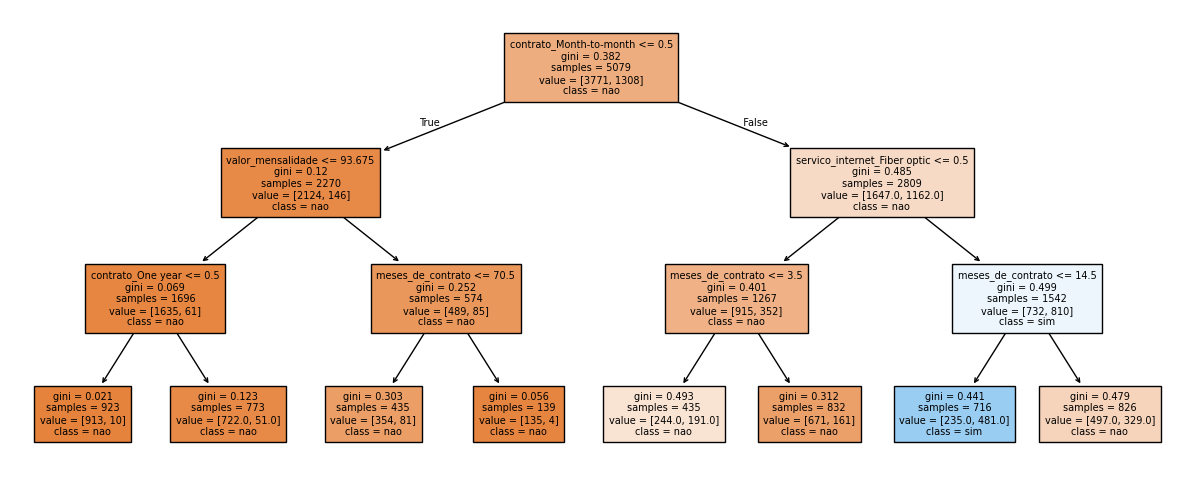

In [62]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 7, feature_names = nome_colunas);

# Normalizando dados

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [65]:
pd.DataFrame(x_treino_normalizado, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__genero_Male,onehotencoder__acima_de_64_anos_1,onehotencoder__conjuge_Yes,onehotencoder__dependentes_Yes,onehotencoder__servico_telefone_Yes,onehotencoder__multiplas_linhas_Yes,onehotencoder__servico_internet_DSL,onehotencoder__servico_internet_Fiber optic,onehotencoder__servico_internet_No,onehotencoder__seguranca_online_Yes,...,onehotencoder__faturamento_online_Yes,onehotencoder__metodo_pagamento_Bank transfer (automatic),onehotencoder__metodo_pagamento_Credit card (automatic),onehotencoder__metodo_pagamento_Electronic check,onehotencoder__metodo_pagamento_Mailed check,remainder__meses_de_contrato,remainder__valor_mensalidade,remainder__valor_total,remainder__contas_diaria,remainder__total_servicos
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.260697,0.002960,0.260697,0.000000
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.394366,0.266169,0.141201,0.266169,0.571429
2,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.845070,0.552736,0.530493,0.552736,0.571429
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.183099,0.017910,0.032368,0.017910,0.714286
4,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.028169,0.863184,0.031808,0.863184,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.507042,0.824378,0.429870,0.824378,0.571429
5075,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.605634,0.590050,0.398373,0.590050,0.571429
5076,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.802817,0.742289,0.609999,0.742289,0.428571
5077,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.943662,0.661194,0.656849,0.661194,0.428571
